## 線形回帰、多項式回帰
多重線形回帰、多項式回帰によりyを予測してみる。<br>
RSSが最も小さい予測変数から順に10,15,20,25,30,35,40個の変数を用いるモデルを組み、どれが一番正答率が高いかを調べる<br>

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
import preprocesses
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score


In [148]:
#データの読み込み
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [149]:
new_train=train[preprocesses.train_valiable_list]
new_test=test[preprocesses.test_valiable_list]
new_train=preprocesses.preprocess(new_train)
new_test=preprocesses.preprocess(new_test)
new_train["SalePrice"]=np.log(new_train["SalePrice"])

/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  t[k]= t[k].map(five_map1)
/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  t["BsmtExposure"]= t["BsmtExposure"].map(five_map2)
/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [150]:
new_train.head(5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrSold,SalePrice,Baths
0,65.0,8450,7,5,2003,2003,196.0,4,3,4,...,61,0,0,0,0,0,0,2008,12.247694,4
1,80.0,9600,6,8,1976,1976,0.0,3,3,4,...,0,0,0,0,0,0,0,2007,12.109011,3
2,68.0,11250,7,5,2001,2002,162.0,4,3,4,...,42,0,0,0,0,0,0,2008,12.317167,4
3,60.0,9550,7,5,1915,1970,0.0,3,3,3,...,35,272,0,0,0,0,0,2006,11.849398,2
4,84.0,14260,8,5,2000,2000,350.0,4,3,4,...,84,0,0,0,0,0,0,2008,12.429216,4


In [151]:
y=new_train[["SalePrice"]]
X=new_train.drop(["SalePrice"], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=2020)
linearmodel=sm.OLS(y_train, X_train).fit()

In [152]:
linearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.723e+05
Date:                Mon, 03 Aug 2020   Prob (F-statistic):                        0.00
Time:                        15:31:24   Log-Likelihood:                          586.76
No. Observations:                1168   AIC:                                     -1086.
Df Residuals:                    1124   BIC:                                     -862.7
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LotFrontage       0.0001      0.000      0.498      0.618      -0.000       0.001
LotArea        2.169e-06   4.56e-07      4.755      0.000    1.27e-06    3.06e-06
OverallQual       0.0723      0.006     11.986      0.000       0.060       0.084
OverallCond       0.0396      0.005      7.305      0.000       0.029       0.050
YearBuilt         0.0018      0.000      4.912      0.000       0.001       0.002
YearRemodAdd      0.0007      0.000      1.925      0.054   -1.29e-05       0.001
MasVnrArea    -6.616e-06   3.04e-05     -0.217      0.828   -6.63e-05    5.31e-05
ExterQual         0.0189      0.013      1.406      0.160      -0.007       0.045
ExterCond        -0.0087      0.014     -0.629      0.529      -0.036       0.018
BsmtQual          0.0271      0.010      2.611      0.009       0.007       0.048
BsmtCond         -0.0097      0.013     -0.762      0.446      -0.035       0.015
BsmtExposure      0.0085      0.005      1.713      0.087      -0.001       0.018
BsmtFinType1      0.0062      0.003      1.777      0.076      -0.001       0.013
BsmtFinSF1    -4.599e-05   2.28e-05     -2.017      0.044   -9.07e-05   -1.24e-06
BsmtUnfSF        -0.0845      0.027     -3.155      0.002      -0.137      -0.032
TotalBsmtSF     5.63e-05   2.63e-05      2.145      0.032    4.79e-06       0.000
HeatingQC         0.0204      0.006      3.458      0.001       0.009       0.032
CentralAir        0.0647      0.022      2.965      0.003       0.022       0.108
1stFlrSF       7.505e-05   2.99e-05      2.508      0.012    1.63e-05       0.000
2ndFlrSF      -2.056e-06   2.66e-05     -0.077      0.938   -5.43e-05    5.02e-05
LowQualFinSF   5.528e-05   6.99e-05      0.791      0.429   -8.19e-05       0.000
GrLivArea         0.0001   2.68e-05      4.782      0.000    7.56e-05       0.000
BedroomAbvGr      0.0085      0.008      1.032      0.302      -0.008       0.025
KitchenAbvGr     -0.0360      0.023     -1.542      0.123      -0.082       0.010
TotRmsAbvGrd      0.0138      0.006      2.263      0.024       0.002       0.026
KitchenQual       0.0272      0.011      2.558      0.011       0.006       0.048
Fireplaces        0.0199      0.014      1.377      0.169      -0.008       0.048
FireplaceQu       0.0097      0.005      1.854      0.064      -0.001       0.020
GarageYrBlt      -0.0004      0.000     -1.029      0.304      -0.001       0.000
GarageFinish      0.0069      0.007      0.952      0.342      -0.007       0.021
GarageCars        0.0592      0.014      4.135      0.000       0.031       0.087
GarageArea     3.868e-05   4.98e-05      0.776      0.438   -5.91e-05       0.000
GarageQual        0.0283      0.022      1.262      0.207      -0.016       0.072
GarageCond       -0.0277      0.

In [153]:
np.sqrt(mean_squared_error(y_valid['SalePrice'], linearmodel.predict(X_valid)))

0.12381220676923944

In [154]:
r2_score(y_valid, linearmodel.predict(X_valid))

0.9128256159934275

決定係数$R^2$スコア(当てはまりが良いと1になる)はとても良さそう…？

# 交差検証
訓練データ(new_train)を4:1で訓練・バリデーションに使う<br>

In [155]:
RMSE=[]
r2_scores=[]
for porder in range(1,4):
    print(porder)
    model = Pipeline([('poly', PolynomialFeatures(degree=porder)),('linear', LinearRegression())])
    k_fold = KFold(n_splits=5)
    test_MSE = cross_validate(model, new_train.drop(["SalePrice"], axis=1), new_train["SalePrice"], 
                           cv=k_fold, scoring=('r2', 'neg_mean_squared_error'))
    RMSE.append(np.sqrt(np.mean(-test_MSE['test_neg_mean_squared_error'])))
    r2_scores.append(np.mean(test_MSE['test_r2']))

1
2
3


In [156]:
RMSE

[0.15438462690874843, 2081.7970251715765, 462.54327482435986]

In [157]:
r2_scores

[0.8498506862917488, -28362930.813126784, -1185107.7354661985]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  best_score = 1e64


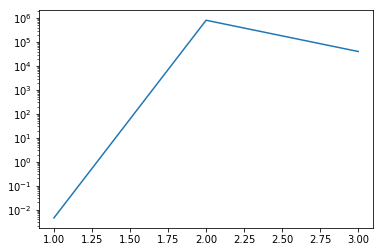

In [158]:
plt.plot([1,2,3],MSE)
plt.yscale("log")
plt.show()

# forward selection
先ほどの結果より線形回帰で十分そうなので、線形回帰を用います。
予測変数無しのモデルから出発し、RSSが最も小さい予測変数を追加するということを繰り返す。Forward selectionが実装されている、mlxtendというライブラリーを用いました。

In [159]:
model = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', LinearRegression())])
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(model, # 使う学習器
           k_features=45, #特徴をいくつまで選択するか
           forward=True, #Trueでforward selectionになる。Falseでback
           verbose=2, #実行時のlogをどれだけ詳しく表示するか
           scoring='neg_mean_squared_error', # 評価指標
           cv=5) #クロスバリデーション
sfs1 = sfs1.fit(new_train.drop(["SalePrice"],axis=1), new_train["SalePrice"])
sfs1.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.4s finished

[2020-08-03 15:32:00] Features: 1/45 -- score: -0.05308652079871525[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    0.3s finished

[2020-08-03 15:32:00] Features: 2/45 -- score: -0.04199733089507811[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.4s finished

[2020-08-03 15:32:01] Features: 3/45 -- score: -0.034608878396070075[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]:

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished

[2020-08-03 15:32:10] Features: 28/45 -- score: -0.02147392837548802[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.3s finished

[2020-08-03 15:32:10] Features: 29/45 -- score: -0.02150062453161044[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s finished

[2020-08-03 15:32:10] Features: 30/45 -- score: -0.02152794604641381[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished

[2020-08-03 15:32:11] Feature

{1: {'feature_idx': (2,),
  'cv_scores': array([-0.04980155, -0.06251804, -0.05522964, -0.04511045, -0.05277293]),
  'avg_score': -0.05308652079871525,
  'feature_names': ('OverallQual',)},
 2: {'feature_idx': (2, 44),
  'cv_scores': array([-0.03774825, -0.04636211, -0.04431548, -0.03656329, -0.04499753]),
  'avg_score': -0.04199733089507811,
  'feature_names': ('OverallQual', 'Baths')},
 3: {'feature_idx': (2, 18, 44),
  'cv_scores': array([-0.02938948, -0.03802265, -0.03277377, -0.02899447, -0.04386401]),
  'avg_score': -0.034608878396070075,
  'feature_names': ('OverallQual', '1stFlrSF', 'Baths')},
 4: {'feature_idx': (2, 18, 30, 44),
  'cv_scores': array([-0.02685902, -0.03428358, -0.03176604, -0.02688683, -0.03765032]),
  'avg_score': -0.03148915797780061,
  'feature_names': ('OverallQual', '1stFlrSF', 'GarageCars', 'Baths')},
 5: {'feature_idx': (2, 3, 18, 30, 44),
  'cv_scores': array([-0.02578019, -0.0328732 , -0.02974545, -0.02414681, -0.03505269]),
  'avg_score': -0.029519668

In [167]:
print(sfs1.subsets_[35]['feature_names'])

('LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'KitchenQual', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'YrSold', 'Baths')


In [168]:
new_train_valiable_list5=['OverallQual', 'OverallCond', '1stFlrSF', 'GarageCars', 'Baths']
new_train_valiable_list10=['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinType1', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'FireplaceQu', 'GarageCars', 'Baths']
new_train_valiable_list15=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'KitchenQual', 'FireplaceQu', 'GarageCars', 'ScreenPorch', 'Baths']
new_train_valiable_list20=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'KitchenQual', 'FireplaceQu', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'PoolQC', 'Baths']
new_train_valiable_list25=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'KitchenQual', 'FireplaceQu', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Baths']
new_train_valiable_list30=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'KitchenQual', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'YrSold', 'Baths']
new_train_valiable_list35=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'KitchenQual', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'YrSold', 'Baths']
new_train_valiable_list40=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'YrSold', 'Baths']

In [169]:
RMSE=[]
r2_scores=[]
for valiables in [new_train_valiable_list10,new_train_valiable_list15,new_train_valiable_list20,new_train_valiable_list25,new_train_valiable_list30,new_train_valiable_list35,new_train_valiable_list40]:
    model = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', LinearRegression())])
    k_fold = KFold(n_splits=5)
    test_MSE = cross_validate(model, new_train[valiables], new_train["SalePrice"], 
                           cv=k_fold, scoring=('r2', 'neg_mean_squared_error'))
    RMSE.append(np.sqrt(np.mean(-test_MSE['test_neg_mean_squared_error'])))
    r2_scores.append(np.mean(test_MSE['test_r2']))

In [170]:
RMSE

[0.15430634237304572,
 0.14907301265504733,
 0.14694045812339898,
 0.1464291268645216,
 0.1467240472670169,
 0.14699405098883017,
 0.14787282368674368]

In [171]:
r2_scores

[0.8504275798243881,
 0.8605142820018188,
 0.8644791449350169,
 0.8653896442172133,
 0.8647960905011463,
 0.8642236802488086,
 0.8626671151617756]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  best_score = 1e64


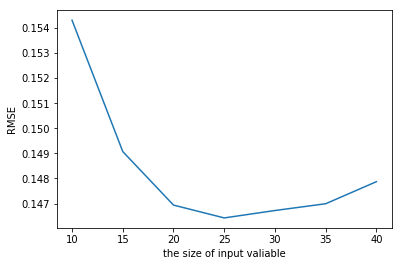

In [172]:
plt.plot([10,15,20,25,30,35,40],RMSE)
plt.xlabel("the size of input valiable")
plt.ylabel("RMSE")
plt.show()

一番良かったnew_train_valiable_list25での学習モデルをkaggleに提出する

In [173]:
model = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', LinearRegression())])
model.fit(new_train[new_train_valiable_list25], new_train["SalePrice"])

# make predictions
yt =model.predict(new_test[new_train_valiable_list25])
output_df=new_test.copy()
output_df["SalePrice"] = np.exp(yt)#値段に戻す
output_df["Id"]=test["Id"]
output_df.to_csv("output.csv",index=False, columns=['Id','SalePrice'])

In [174]:
!head output.csv

Id,SalePrice
1461,115948.03296044587
1462,148746.21210594405
1463,169253.96036053615
1464,198187.4548653839
1465,193175.446210854
1466,165772.51933906358
1467,183583.23543063801
1468,163163.65933103874
1469,188208.1057196165


In [175]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f output.csv -m  "test" 

100%|██████████████████████████████████████| 33.7k/33.7k [00:03<00:00, 9.01kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques

スコアは0.14590だった。